# Proyecto I 
* Monica Alfaro Parrales
* Adrián Ramírez Mattey
* Gilberth Rodríguez Mejías 

## Carga del dataset "Pima Indians Diabetes Database"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

In [ ]:
data = pd.read_csv('diabetes.csv')
print("data head")
display(data.head())
print("data describe")
display(data.describe())
display(data)

X = data[[
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]].values

y = data['Outcome']

## Análisis de datos
1 = Diabetes

0 = No diabetes

### Gráficos de dispersión 

In [ ]:
sns.scatterplot(x='Pregnancies', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Embarazos")
plt.xlabel("Embarazos")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='Glucose', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Glucosa")
plt.xlabel("Glucosa")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='BloodPressure', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Presión Arterial")
plt.xlabel("Presión arterial")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='SkinThickness', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Grosor de la piel")
plt.xlabel("Grosor de la piel")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='Insulin', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Insulina")
plt.xlabel("Insulina")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='BMI', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de BMI")
plt.xlabel("BMI")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='DiabetesPedigreeFunction', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Diabetes Pedigree")
plt.xlabel("Diabetes Pedigree")
plt.ylabel("Edad")
plt.show()


### Histogramas

In [ ]:
dataGroup = data.groupby('Outcome')
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Pregnancies'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Pregnancies'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Embarazos')
plt.xlabel('Embarazos')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Glucose'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Glucose'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Glucosa')
plt.xlabel('Glucosa')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Insulin'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Insulin'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Insulina')
plt.xlabel('Insulina')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['BMI'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['BMI'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - BMI')
plt.xlabel('BMI')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['DiabetesPedigreeFunction'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['DiabetesPedigreeFunction'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - DiabetesPedigreeFunction')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Age'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Age'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Edad')
plt.xlabel('Edad')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

## Eliminación de outliers y división del dataset
Se procede a hacer uso de IQR, el rango intercuartil (IQR) es la diferencia entre el percentil 75 y el 25 de los datos. Es una medida de dispersión similar a la desviación estándar o la varianza, pero es mucho más robusta frente a valores atípicos. Posteriormente, se hace un shuffle de la data para asegurar una mayor distribución y se divide el dataset en un 80% training y 20% testing. 

In [ ]:
# Calcula el IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identifica los outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# Encuentra las filas que tienen al menos un outlier
outliers_indices = outliers.any(axis=1)

# Muestra las filas con outliers
print("Filas con outliers:")
display(data[outliers_indices])

# Elimina los outliers
data_sin_outliers = data[~outliers_indices]

# Muestra el conjunto de datos sin outliers
print("Data sin outliers:")
display(data_sin_outliers)

# Estadísticas del conjunto de datos sin outliers
print("Data sin outliers")
display(data_sin_outliers.describe())

### Gráficos de dispersión posterior a eliminación de outliers

In [ ]:
sns.scatterplot(x='Pregnancies', y='Age', hue='Outcome', data=data_sin_outliers, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Embarazos (no outliers)")
plt.xlabel("Embarazos")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='Glucose', y='Age', hue='Outcome', data=data_sin_outliers )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Glucosa (no outliers)")
plt.xlabel("Glucosa")
plt.ylabel("Edad")
plt.show()


In [ ]:
sns.scatterplot(x='BloodPressure', y='Age', hue='Outcome', data=data_sin_outliers, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Presión Arterial (no outliers)")
plt.xlabel("Presión arterial")
plt.ylabel("Edad")
plt.show()


In [ ]:
sns.scatterplot(x='SkinThickness', y='Age', hue='Outcome', data=data_sin_outliers, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Grosor de la piel (no outliers)")
plt.xlabel("Grosor de la piel")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='Insulin', y='Age', hue='Outcome', data=data_sin_outliers )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Insulina (no outliers)")
plt.xlabel("Insulina")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='BMI', y='Age', hue='Outcome', data=data_sin_outliers)

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de BMI (no outliers)")
plt.xlabel("BMI")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='DiabetesPedigreeFunction', y='Age', hue='Outcome', data=data_sin_outliers, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Diabetes Pedigree (no outliers)")
plt.xlabel("Diabetes Pedigree")
plt.ylabel("Edad")
plt.show()

### Actualizacion de datos en 0 y normalización

In [ ]:
'''
Media de los datos sin outliers
Pregnancies	Glucose	    BloodPressure	SkinThickness	Insulin	    BMI	        DiabetesPedigreeFunction	Age
3.804382	119.112676	72.120501	    20.563380	    65.931142	32.00579	0.429177	                32.715180
'''
data_sin_ceros = data_sin_outliers.copy()
data_sin_ceros.loc[data_sin_ceros['Pregnancies'] == 0, 'Pregnancies'] = 4 #Numeros enteros en el data set se rendondea 3.804382 a 4
data_sin_ceros.loc[data_sin_ceros['Glucose'] == 0, 'Glucose'] = 120 #Numeros enteros en el data set se rendondea  119.112676 a 120
data_sin_ceros.loc[data_sin_ceros['BloodPressure'] == 0, 'BloodPressure'] = 72 #Numeros enteros en el data set se rendondea 72.120501 a 72
data_sin_ceros.loc[data_sin_ceros['SkinThickness'] == 0, 'SkinThickness'] = 21 #Numeros enteros en el data set se rendondea 20.563380 a 21
data_sin_ceros.loc[data_sin_ceros['Insulin'] == 0, 'Insulin'] = 66 #Numeros enteros en el data set se rendondea 65.931142 a 80
data_sin_ceros.loc[data_sin_ceros['BMI'] == 0, 'BMI'] = 32.0 #Numeros enteros en el data set se rendondea 32.00579 a 32.0
data_sin_ceros.loc[data_sin_ceros['DiabetesPedigreeFunction'] == 0, 'DiabetesPedigreeFunction'] = 0.429 #Numeros enteros en el data set se rendondea 0.429177 a 0.429
print("Data sin ceros")
display(data_sin_ceros.head())

'''
Normalizacion de los datos
Minimos
Pregnancies	Glucose	    BloodPressure	SkinThickness	Insulin	    BMI	        DiabetesPedigreeFunction	Age
0.000000	44.000000	38.000000	    0.000000	    0.000000	18.20000	0.078000	                21.000000

Maximos
Pregnancies	Glucose	    BloodPressure	SkinThickness	Insulin	    BMI	        DiabetesPedigreeFunction	Age
13.000000	198.000000	106.000000	    60.000000	    318.000000	50.00000	1.191000	                66.000000	
'''
data_normalizada = data_sin_ceros.copy()
data_normalizada['Pregnancies'] = (data_normalizada['Pregnancies'] - data_normalizada['Pregnancies'].min()) / (data_normalizada['Pregnancies'].max() - data_normalizada['Pregnancies'].min())
data_normalizada['Glucose'] = (data_normalizada['Glucose'] - data_normalizada['Glucose'].min()) / (data_normalizada['Glucose'].max() - data_normalizada['Glucose'].min())
data_normalizada['BloodPressure'] = (data_normalizada['BloodPressure'] - data_normalizada['BloodPressure'].min()) / (data_normalizada['BloodPressure'].max() - data_normalizada['BloodPressure'].min())
data_normalizada['SkinThickness'] = (data_normalizada['SkinThickness'] - data_normalizada['SkinThickness'].min()) / (data_normalizada['SkinThickness'].max() - data_normalizada['SkinThickness'].min())
data_normalizada['Insulin'] = (data_normalizada['Insulin'] - data_normalizada['Insulin'].min()) / (data_normalizada['Insulin'].max() - data_normalizada['Insulin'].min())
data_normalizada['BMI'] = (data_normalizada['BMI'] - data_normalizada['BMI'].min()) / (data_normalizada['BMI'].max() - data_normalizada['BMI'].min())
data_normalizada['DiabetesPedigreeFunction'] = (data_normalizada['DiabetesPedigreeFunction'] - data_normalizada['DiabetesPedigreeFunction'].min()) / (data_normalizada['DiabetesPedigreeFunction'].max() - data_normalizada['DiabetesPedigreeFunction'].min())
data_normalizada['Age'] = (data_normalizada['Age'] - data_normalizada['Age'].min()) / (data_normalizada['Age'].max() - data_normalizada['Age'].min())
print("Data normalizada")
display(data_normalizada.head())


### División del dataset

In [ ]:
# Antes de dividir los datos, barajamos el dataset de forma aleatoria para mayor diversidad de datos
dataset_shuffled = shuffle(data_sin_outliers, random_state=20)  # random_state para reproducibilidad
dataset_shuf_sin_ceros = shuffle(data_sin_ceros, random_state=20)  # random_state para reproducibilidad
dataset_shuf_normalizada = shuffle(data_normalizada, random_state=20)  # random_state para reproducibilidad
# random_state = 50 malos resultados en el modelo || random_state = 20 buenos resultados en el modelo

# Dividir los datos en conjunto de entrenamiento y prueba
p_train = 0.8  # Porcentaje de training set
train_index = int(len(dataset_shuffled) * p_train)

dataFrameTraining = dataset_shuffled[:train_index]
dataFrameTraining_sin_ceros = dataset_shuf_sin_ceros[:train_index]
dataFrameTraining_normalizada = dataset_shuf_normalizada[:train_index]

dataFrameTesting = dataset_shuffled[train_index:]
dataFrameTesting_sin_ceros = dataset_shuf_sin_ceros[train_index:]
dataFrameTesting_normalizada = dataset_shuf_normalizada[train_index:]

print("Ejemplos usados para entrenar: ", len(dataFrameTraining))
print("Ejemplos usados para test: ", len(dataFrameTesting))

### Funcion para dividir los datos en x_train, y_train, x_test, y_test

In [ ]:
def xyDivide(dataFrameTraining, dataFrameTesting):
    x_train = dataFrameTraining[[
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
    ]].values

    y_train = dataFrameTraining['Outcome']

    x_test = dataFrameTesting[[
        'Pregnancies',
        'Glucose',
        'BloodPressure',
        'SkinThickness',
        'Insulin',
        'BMI',
        'DiabetesPedigreeFunction',
        'Age'
    ]].values

    y_test = dataFrameTesting['Outcome']
    return x_train, y_train, x_test, y_test

### Funciones para graficar las métricas

In [ ]:
def printAccGraph(lst):
    acc = []
    for i in range(0, len(lst)):
        acc.append(lst[i]['acc'])
    plt.plot(acc)
    plt.title('Accuracy')
    plt.xlabel('Iteraciones')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

def printPrecGraph(lst):
    prec = []
    for i in range(0, len(lst)):
        prec.append(lst[i]['prec'])
    plt.plot(prec)
    plt.title('Precision')
    plt.xlabel('Iteraciones')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.show()

def printRecGraph(lst):
    rec = []
    for i in range(0, len(lst)):
        rec.append(lst[i]['rec'])
    plt.plot(rec)
    plt.title('Recall')
    plt.xlabel('Iteraciones')
    plt.ylabel('Recall')
    plt.grid(True)
    plt.show()

def printF1Graph(lst):
    f1 = []
    for i in range(0, len(lst)):
        f1.append(lst[i]['f1'])
    plt.plot(f1)
    plt.title('F1')
    plt.xlabel('Iteraciones')
    plt.ylabel('F1')
    plt.grid(True)
    plt.show()

def printAucGraph(lst):
    auc = []
    for i in range(0, len(lst)):
        auc.append(lst[i]['auc'])
    plt.plot(auc)
    plt.title('AUC')
    plt.xlabel('Iteraciones')
    plt.ylabel('AUC')
    plt.grid(True)
    plt.show()

## KNN y metricas del KNN

### KNN con data set sin outliers

In [ ]:
x_train, y_train, x_test, y_test = xyDivide(dataFrameTraining, dataFrameTesting)
lst = []

for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lst.append({"k": i, "acc": acc, "prec": prec, "rec": rec, "f1": f1, "auc": auc, "roc": roc})


maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"k = {maxAuc['k']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Percision")
print(f"k = {maxPrec['k']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"k = {maxRec['k']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"k = {maxF1['k']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"k = {maxAcc['k']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)


'''plt.plot(roc[0], roc[1], label=f"K = {i}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid(True)
plt.legend()
plt.show()'''

### KNN data set sin ceros

In [ ]:
x_train, y_train, x_test, y_test = xyDivide(dataFrameTraining_sin_ceros, dataFrameTesting_sin_ceros)
lst = []

for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lst.append({"k": i, "acc": acc, "prec": prec, "rec": rec, "f1": f1, "auc": auc, "roc": roc})


maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"k = {maxAuc['k']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Percision")
print(f"k = {maxPrec['k']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"k = {maxRec['k']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"k = {maxF1['k']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"k = {maxAcc['k']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)


'''plt.plot(roc[0], roc[1], label=f"K = {i}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid(True)
plt.legend()
plt.show()'''

### KNN data set normalizado

In [ ]:
x_train, y_train, x_test, y_test = xyDivide(dataFrameTraining, dataFrameTesting)
lst = []

for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lst.append({"k": i, "acc": acc, "prec": prec, "rec": rec, "f1": f1, "auc": auc, "roc": roc})


maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"k = {maxAuc['k']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Percision")
print(f"k = {maxPrec['k']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"k = {maxRec['k']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"k = {maxF1['k']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"k = {maxAcc['k']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)


'''plt.plot(roc[0], roc[1], label=f"K = {i}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid(True)
plt.legend()
plt.show()'''

## Redes neuronales
Las redes neuronales se desarrollaron haciendo uso de la librería de Scikit Learn. 
Hiperparámetros:
* hidden_layer_sizes tupla, length = n_layers - 2, default=(100,): El elemento i-ésimo representa el número de neuronas en la i-ésima capa oculta.
* activation{“identity”, “logistic”, “tanh”, “relu”}, default=”relu”. Función de activación para la capa oculta.
    * “identity”, activación no-op, útil para implementar el cuello de botella lineal, devuelve f(x) = x
    * “logistic”, la función sigmoide logística, devuelve f(x) = 1 / (1 + exp(-x)).
    * “tanh”, la función tangente hiperbólica, devuelve f(x) = tanh(x).
    * “relu”, la función de unidad lineal rectificada, devuelve f(x) = max(0, x)
* solver{“lbfgs”, “sgd”, “adam”}, default=”adam”: El solucionador para la optimización de la ponderación.
    * “lbfgs” es un optimizador en la familia de los métodos cuasi-Newton.
    *  “sgd” se refiere al descenso de gradiente estocástico.
    *   “adam” se refiere a un optimizador basado en el gradiente estocástico propuesto por Kingma, Diederik y Jimmy Ba

Nota: El solucionador por defecto “adam” funciona bastante bien en conjuntos de datos relativamente grandes (con miles de muestras de entrenamiento o más) en términos de tiempo de entrenamiento y puntuación de validación. Sin embargo, para conjuntos de datos pequeños, “lbfgs” puede converger más rápido y funcionar mejor.

* max_iterint, default=200: Número máximo de iteraciones. El solucionador itera hasta la convergencia (determinada por “tol”) o este número de iteraciones. Para los solucionadores estocásticos (“sgd”, “adam”), ten en cuenta que esto determina el número de épocas (cuántas veces se utilizará cada punto de datos), no el número de pasos del gradiente.
* random_state, entero, instancia de RandomState, default=None: Determina la generación de números aleatorios para la inicialización de las ponderaciones y el sesgo, la división de entrenamiento-prueba si se utiliza la parada anticipada, y el muestreo por lotes cuando solver=”sgd” o “adam”. Pasa un int para obtener resultados reproducibles a través de múltiples llamadas a la función.



### Experimentación de diferentes cantidades de neuronas, redes y epochs

#### Epochs = 4700, Redes = 1, Neuronas = 1-50
La utilización de epochs menores o iguales que 4600 genera que en algunas ocasiones la red con más de 40 neuronas no converja, por lo que se utiliza la cantidad de epochs 4700. 

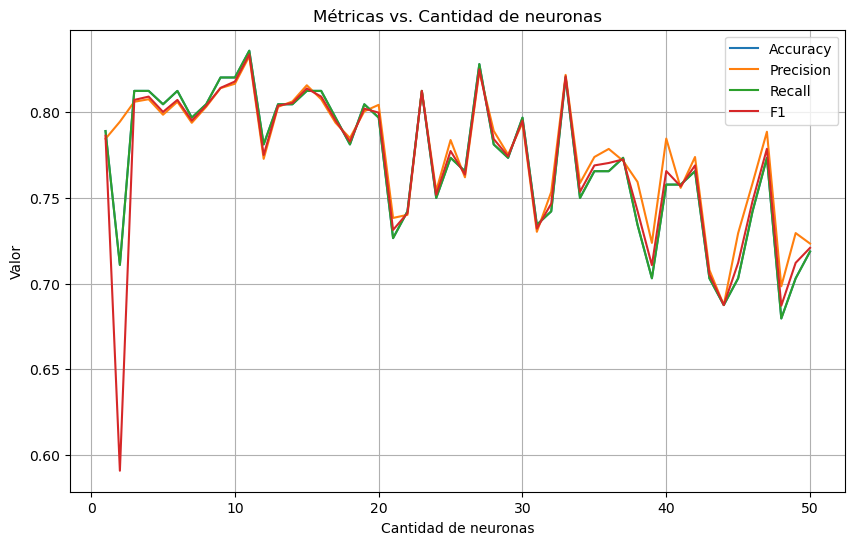

In [94]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []

# Iterar sobre el rango especificado
for i in range(1, 51):
    model = MLPClassifier(
        hidden_layer_sizes=(i,),
        activation='relu',
        solver='lbfgs',
        max_iter=4700,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

Max AUC
neu = 11 || AUC = 0.7883872883872883 || Precision = 0.8327254771589487 || Recall = 0.8359375 || F1 = 0.8338016273315569 || Accuracy = 0.8359375
Max Precision
neu = 11 || AUC = 0.7883872883872883 || Precision = 0.8327254771589487 || Recall = 0.8359375 || F1 = 0.8338016273315569 || Accuracy = 0.8359375
Max Recall
neu = 11 || AUC = 0.7883872883872883 || Precision = 0.8327254771589487 || Recall = 0.8359375 || F1 = 0.8338016273315569 || Accuracy = 0.8359375
Max F1
neu = 11 || AUC = 0.7883872883872883 || Precision = 0.8327254771589487 || Recall = 0.8359375 || F1 = 0.8338016273315569 || Accuracy = 0.8359375
Max Accuracy
neu = 11 || AUC = 0.7883872883872883 || Precision = 0.8327254771589487 || Recall = 0.8359375 || F1 = 0.8338016273315569 || Accuracy = 0.8359375


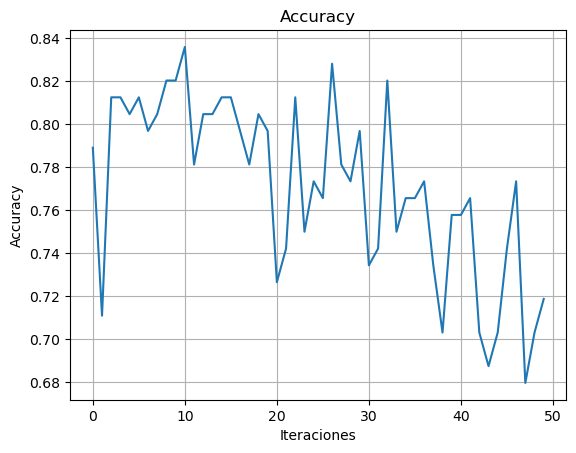

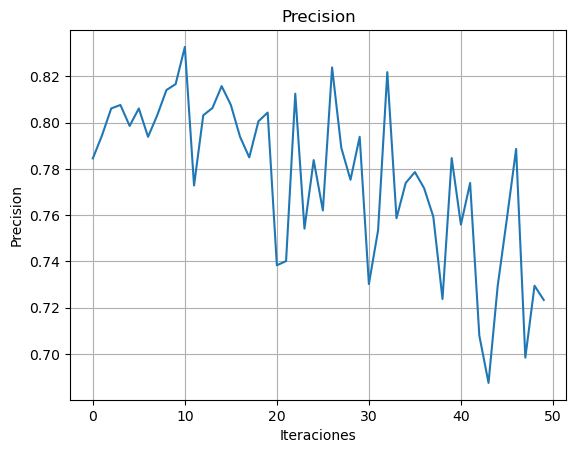

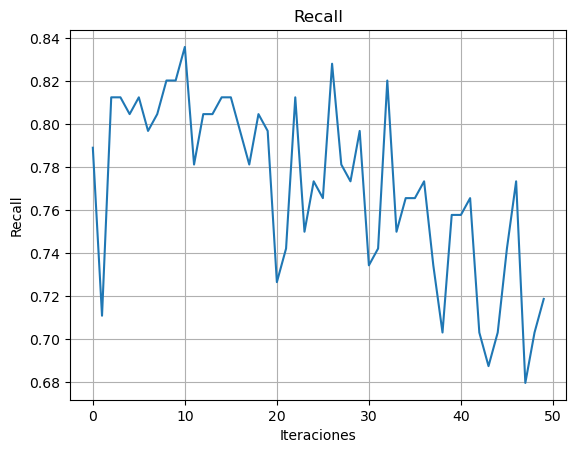

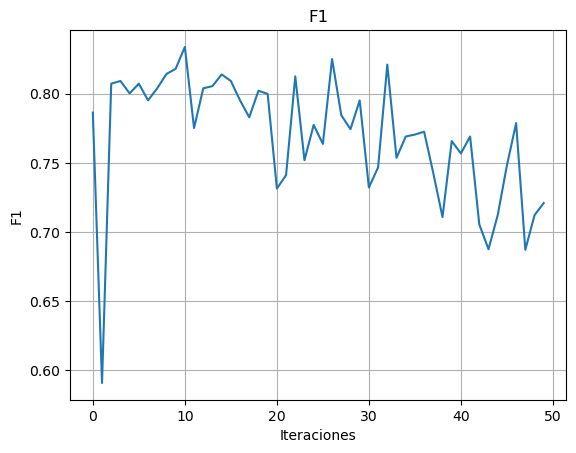

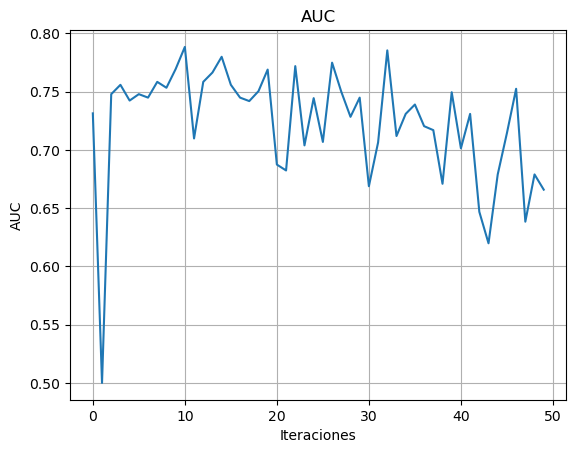

In [95]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

#### Epochs = 5900, Redes = 1, Neuronas = 50-100
La utilización de epochs menores o iguales que 5800 genera que la red con más de 80 neuronas no converja, por lo que se utiliza la cantidad de epochs 5900. 

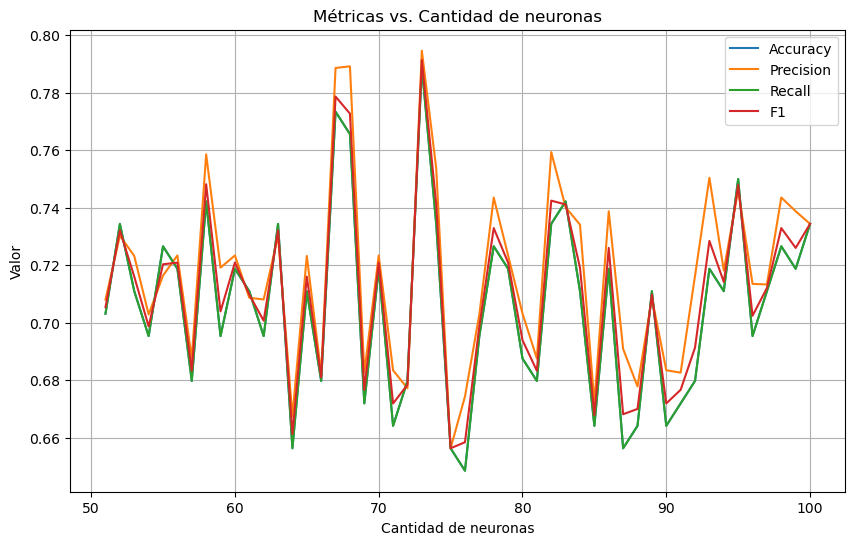

In [92]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []

# Iterar sobre el rango especificado
for i in range(51, 101):
    model = MLPClassifier(
        hidden_layer_sizes=(i,),
        activation='relu',
        solver='lbfgs',
        max_iter=5900,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

Max AUC
neu = 73 || AUC = 0.7554202554202555 || Precision = 0.7946555397727273 || Recall = 0.7890625 || F1 = 0.7914040393963578 || Accuracy = 0.7890625
Max Precision
neu = 73 || AUC = 0.7554202554202555 || Precision = 0.7946555397727273 || Recall = 0.7890625 || F1 = 0.7914040393963578 || Accuracy = 0.7890625
Max Recall
neu = 73 || AUC = 0.7554202554202555 || Precision = 0.7946555397727273 || Recall = 0.7890625 || F1 = 0.7914040393963578 || Accuracy = 0.7890625
Max F1
neu = 73 || AUC = 0.7554202554202555 || Precision = 0.7946555397727273 || Recall = 0.7890625 || F1 = 0.7914040393963578 || Accuracy = 0.7890625
Max Accuracy
neu = 73 || AUC = 0.7554202554202555 || Precision = 0.7946555397727273 || Recall = 0.7890625 || F1 = 0.7914040393963578 || Accuracy = 0.7890625


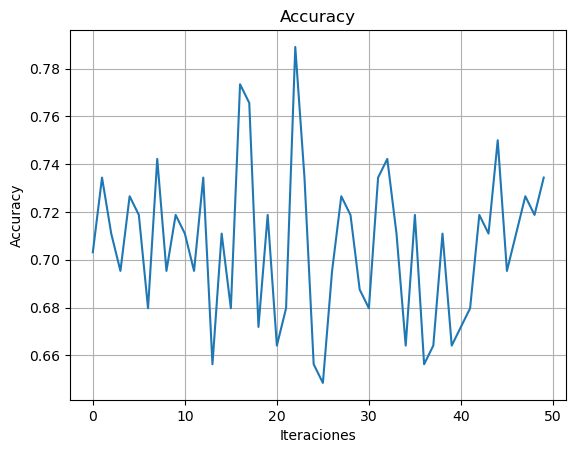

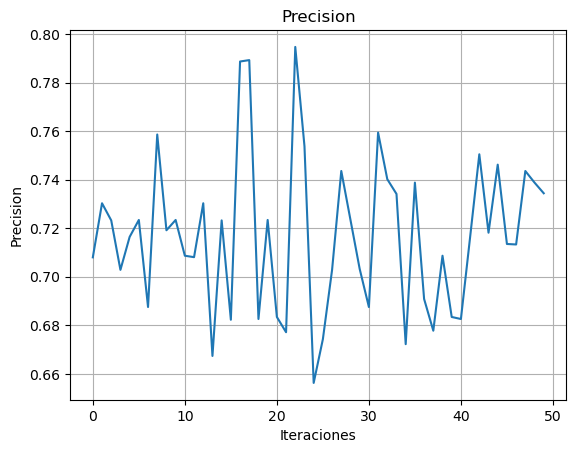

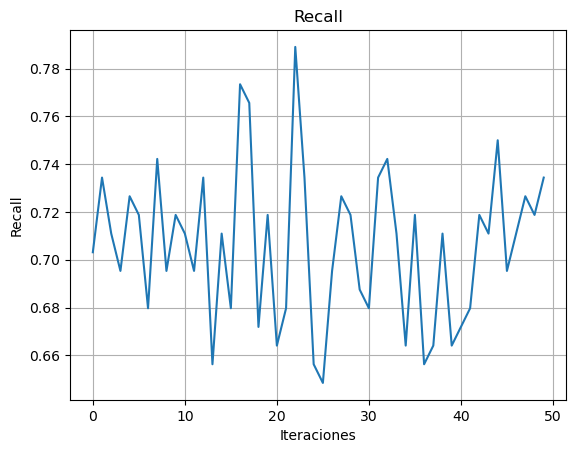

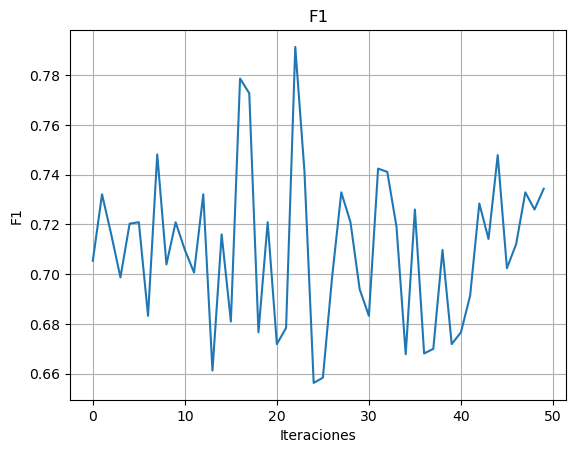

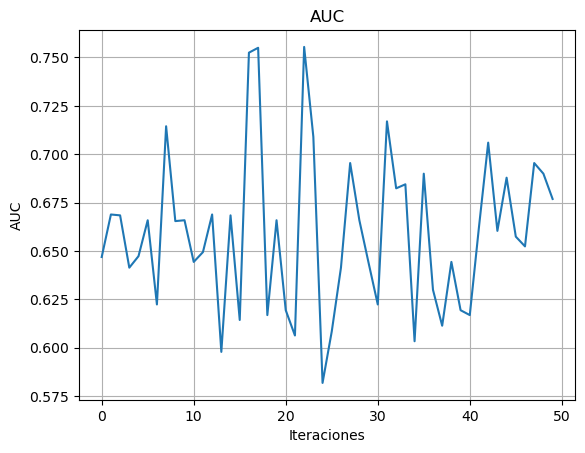

In [93]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

#### Epochs = 4700, Redes = 2, Neuronas = 1-50
La utilización de epochs menores o iguales que 4700 genera que la red con más de 40 neuronas no converja, por lo que se utiliza la cantidad de epochs 4700. 

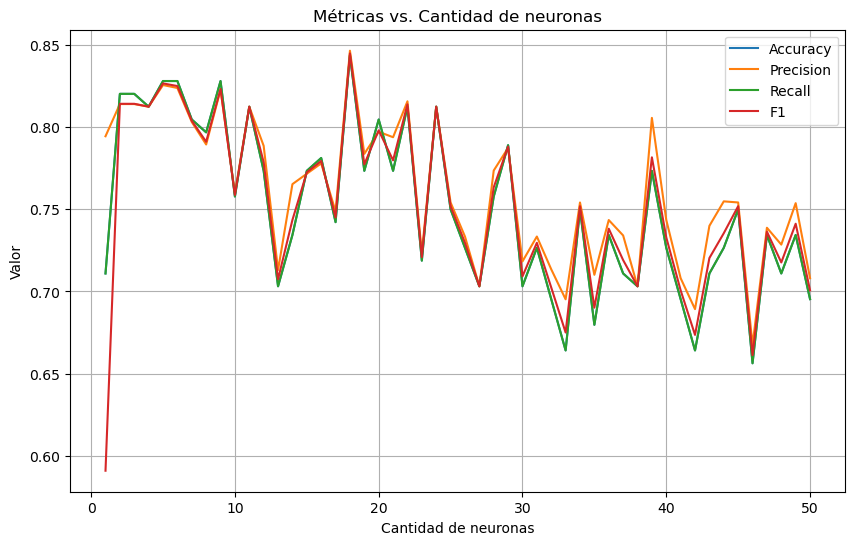

In [90]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []

# Iterar sobre el rango especificado
for i in range(1, 51):
    model = MLPClassifier(
        hidden_layer_sizes=(i,i,),
        activation='relu',
        solver='lbfgs',
        max_iter=4700,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

Max AUC
neu = 18 || AUC = 0.817938817938818 || Precision = 0.846576995102276 || Recall = 0.84375 || F1 = 0.8449378654970761 || Accuracy = 0.84375
Max Precision
neu = 18 || AUC = 0.817938817938818 || Precision = 0.846576995102276 || Recall = 0.84375 || F1 = 0.8449378654970761 || Accuracy = 0.84375
Max Recall
neu = 18 || AUC = 0.817938817938818 || Precision = 0.846576995102276 || Recall = 0.84375 || F1 = 0.8449378654970761 || Accuracy = 0.84375
Max F1
neu = 18 || AUC = 0.817938817938818 || Precision = 0.846576995102276 || Recall = 0.84375 || F1 = 0.8449378654970761 || Accuracy = 0.84375
Max Accuracy
neu = 18 || AUC = 0.817938817938818 || Precision = 0.846576995102276 || Recall = 0.84375 || F1 = 0.8449378654970761 || Accuracy = 0.84375


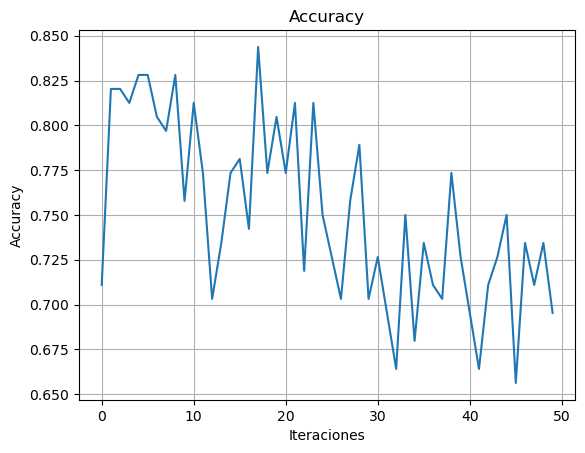

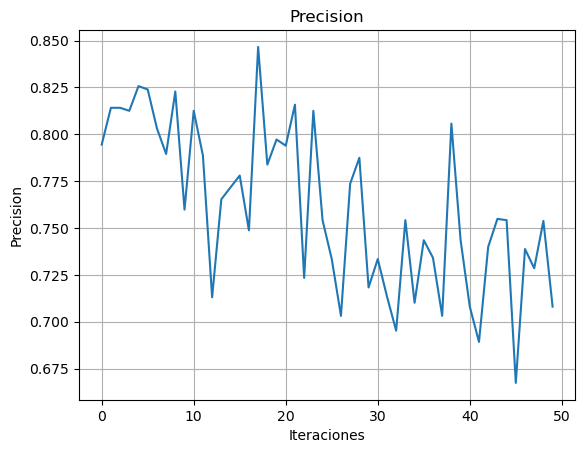

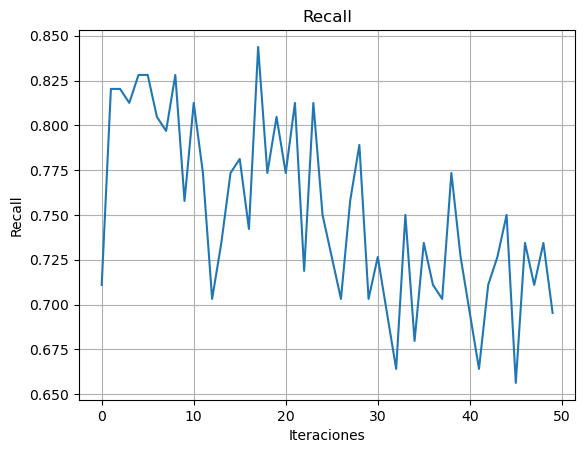

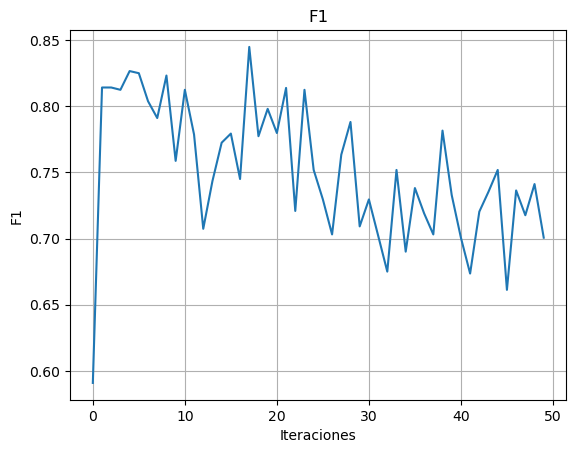

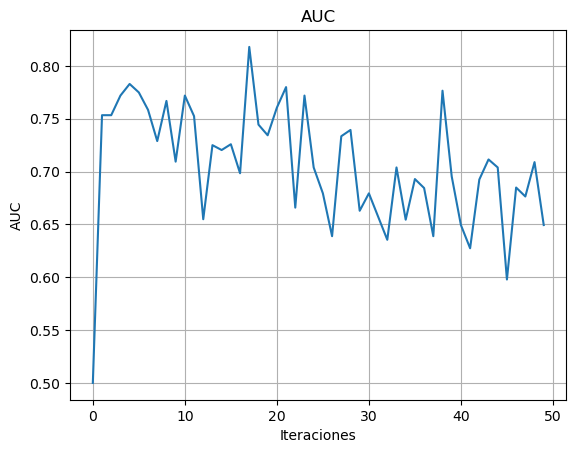

In [91]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

#### Epochs = 5900, Redes = 2, Neuronas = 50-100
La utilización de epochs menores o iguales que 5800 genera que la red con más de 80 neuronas no converja, por lo que se utiliza la cantidad de epochs 5900. 

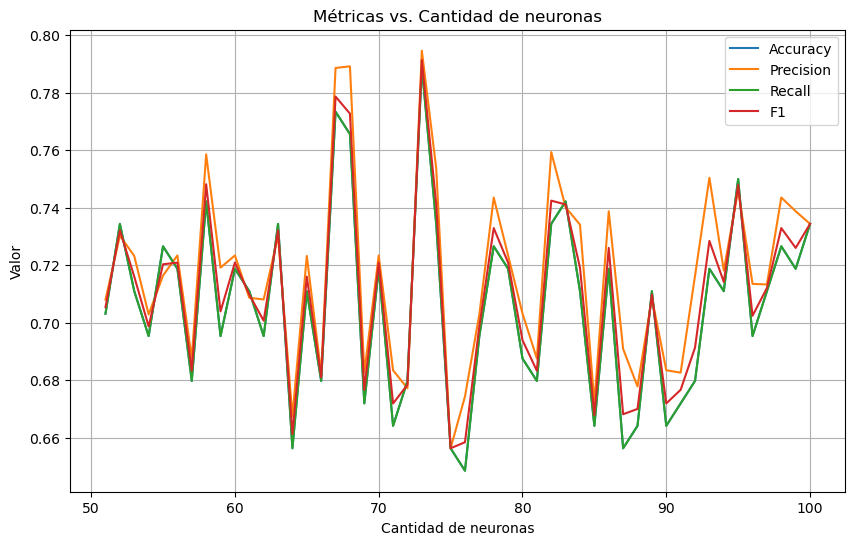

In [96]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []

# Iterar sobre el rango especificado
for i in range(51, 101):
    model = MLPClassifier(
        hidden_layer_sizes=(i,),
        activation='relu',
        solver='lbfgs',
        max_iter=5900,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

Max AUC
neu = 73 || AUC = 0.7554202554202555 || Precision = 0.7946555397727273 || Recall = 0.7890625 || F1 = 0.7914040393963578 || Accuracy = 0.7890625
Max Precision
neu = 73 || AUC = 0.7554202554202555 || Precision = 0.7946555397727273 || Recall = 0.7890625 || F1 = 0.7914040393963578 || Accuracy = 0.7890625
Max Recall
neu = 73 || AUC = 0.7554202554202555 || Precision = 0.7946555397727273 || Recall = 0.7890625 || F1 = 0.7914040393963578 || Accuracy = 0.7890625
Max F1
neu = 73 || AUC = 0.7554202554202555 || Precision = 0.7946555397727273 || Recall = 0.7890625 || F1 = 0.7914040393963578 || Accuracy = 0.7890625
Max Accuracy
neu = 73 || AUC = 0.7554202554202555 || Precision = 0.7946555397727273 || Recall = 0.7890625 || F1 = 0.7914040393963578 || Accuracy = 0.7890625


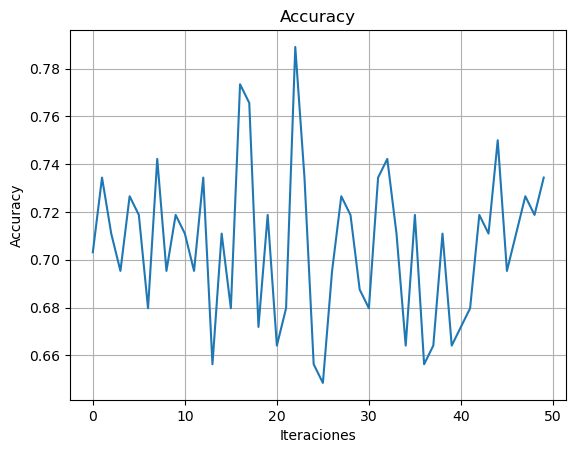

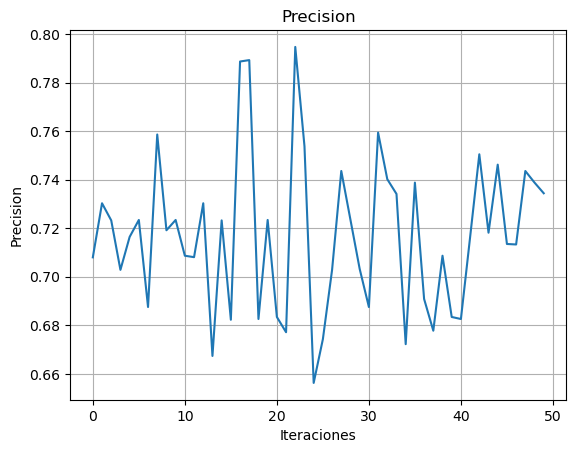

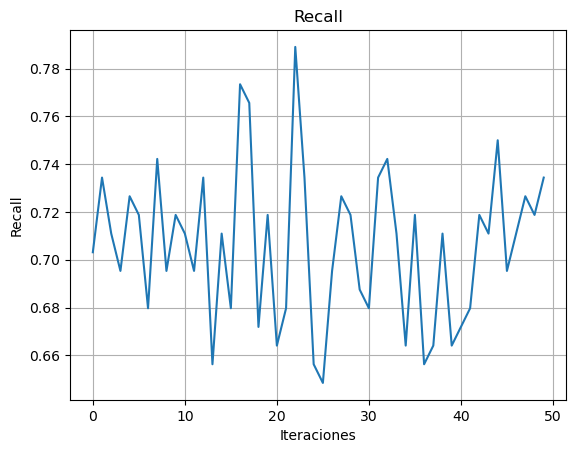

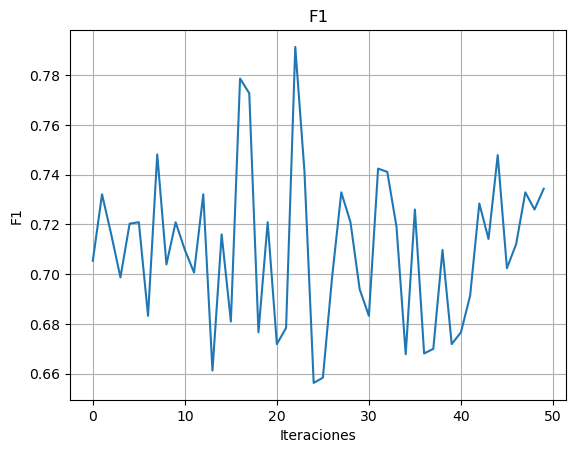

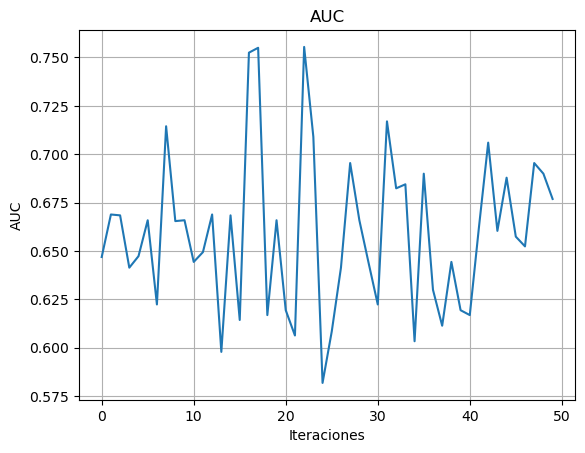

In [97]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

#### Epochs = 4700, Redes = 3, Neuronas = 1-50
La utilización de epochs menores o iguales que 4700 genera que la red con más de 40 neuronas no converja, por lo que se utiliza la cantidad de epochs 4700. 

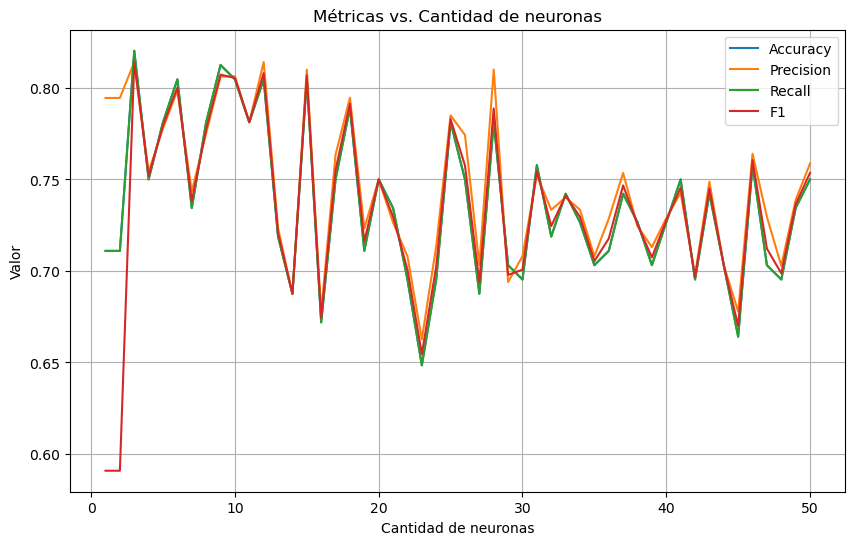

In [102]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []

# Iterar sobre el rango especificado
for i in range(1, 51):
    model = MLPClassifier(
        hidden_layer_sizes=(i,i,i,),
        activation='relu',
        solver='lbfgs',
        max_iter=6000,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

Max AUC
neu = 12 || AUC = 0.7824472824472826 || Precision = 0.8140962416943522 || Recall = 0.8046875 || F1 = 0.8081096241865122 || Accuracy = 0.8046875
Max Precision
neu = 3 || AUC = 0.7533412533412535 || Precision = 0.8140997023809524 || Recall = 0.8203125 || F1 = 0.8142533858485352 || Accuracy = 0.8203125
Max Recall
neu = 3 || AUC = 0.7533412533412535 || Precision = 0.8140997023809524 || Recall = 0.8203125 || F1 = 0.8142533858485352 || Accuracy = 0.8203125
Max F1
neu = 3 || AUC = 0.7533412533412535 || Precision = 0.8140997023809524 || Recall = 0.8203125 || F1 = 0.8142533858485352 || Accuracy = 0.8203125
Max Accuracy
neu = 3 || AUC = 0.7533412533412535 || Precision = 0.8140997023809524 || Recall = 0.8203125 || F1 = 0.8142533858485352 || Accuracy = 0.8203125


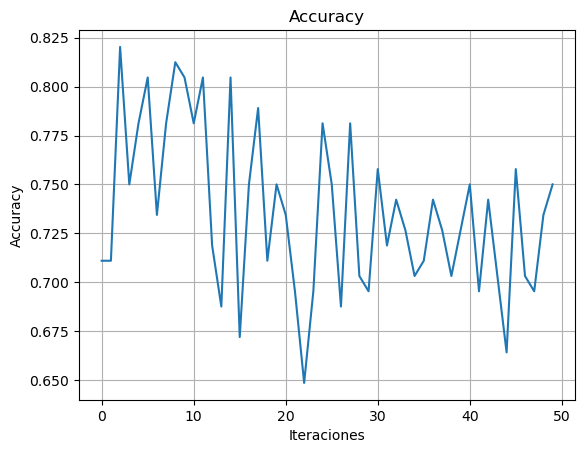

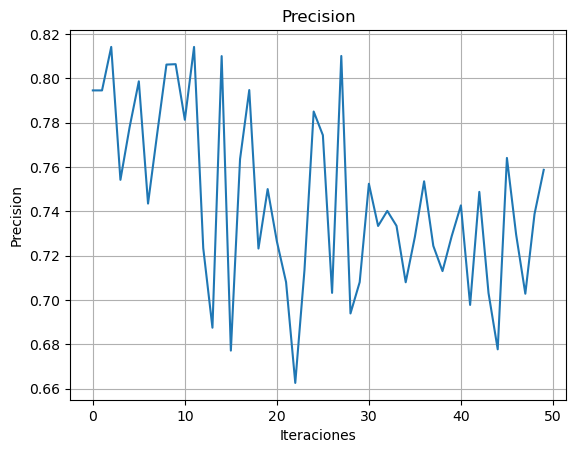

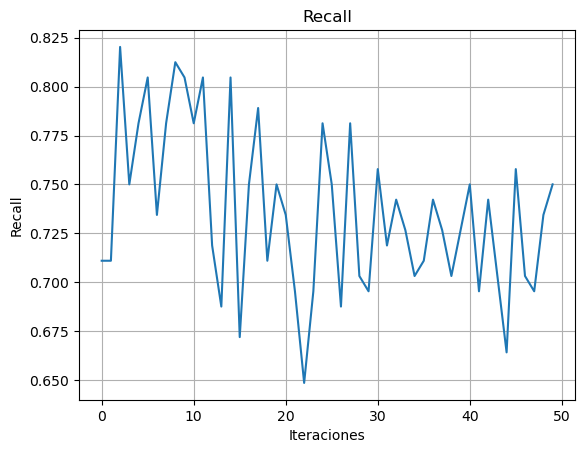

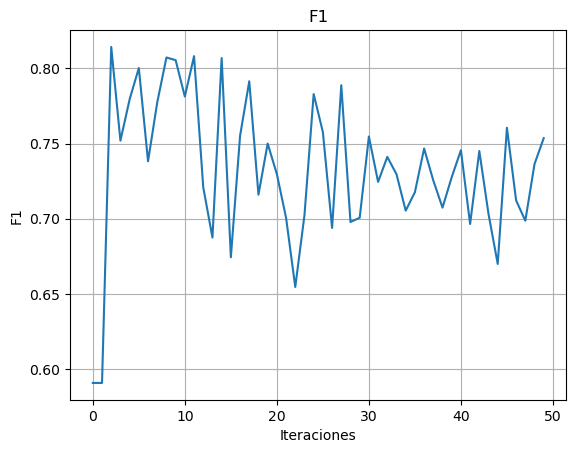

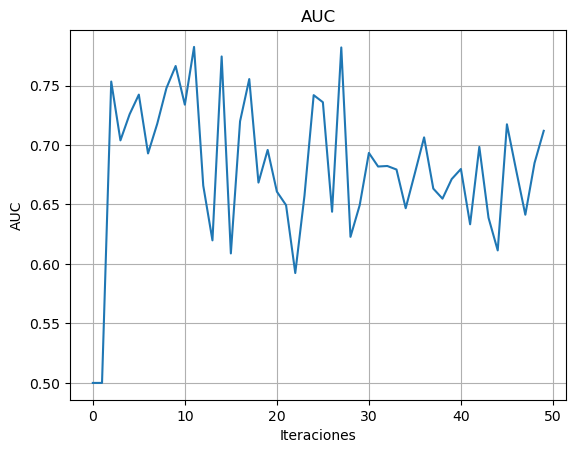

In [103]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

# Carga del dataset "The Spotify Hit Predictor Dataset (1960-2019)" específico del 2010 al 2019

In [ ]:
data = pd.read_csv('dataset-of-10s.csv')
print("data head")
display(data.head())
print("data info")
display(data.describe())